<a href="https://colab.research.google.com/github/iqrasarwar/ComputerVision/blob/main/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

In [99]:
#read image in BGR
img = cv2.imread('/content/drive/MyDrive/ComputerVisionCoLabFiles/book.png')
#making an array for convoluted result
result = np.zeros(shape = (img.shape[0],img.shape[1],3))
original_A =img
original_A = cv2.cvtColor(original_A, cv2.COLOR_BGR2RGB)

In [100]:
#seprating blue, green and red channels
blue_channel = img[:,:,0]
green_channel = img[:,:,1]
red_channel = img[:,:,2]

In [101]:
def convolution(mask,img):
    # "convoluted" stores the final result of convolution performed on "img"
    convoluted = np.zeros(shape = (img.shape[0],img.shape[1]))
    r = img.shape[0]
    c = img.shape[1]
    for i in range(r):
        for j in range(c):
            # current stores the currently active portion of img that is to be multiplied with mask
            current = np.zeros(shape = (mask.shape[0],mask.shape[1]))
            r1 = mask.shape[0]
            c1 = mask.shape[1]
            # finding the center location of the mask
            a = math.floor(r1/2)
            b = math.floor(c1/2)
            x = 0
            #these two loops iterates the area of image below the kernel that should be multilied with mask
            for k in range(i-a,i+a+1):
                y=0
                for l in range(j-b,j+b+1):
                    #if valid location of image exist at the given indexes copy it to to current(that will be multiplid with mask/kernel)
                    #else it contains zero by default
                    if(k >= 0 and l >= 0 and k < r and l < c):
                        current[x][y] = img[k][l] 
                    y= y+1
                x=x+1
            sum = 0
            #multiply the respective vales and add them
            for m in range (x):
                n=0
                for n in range(y):
                    sum += current[m][n]*mask[m][n]
            # store the convoluted result for partivular pixel i j in convoluted array
            convoluted[i][j] = sum
    return convoluted

In [102]:
#for the given channels of image and a kernel perform convolution on all channels and return the reslut
def performConvolution(red_channel,green_channel,blue_channel,kernel,result):
    #flip the kernel before convolution
    kernel = flip(kernel)
    result[:,:,0] = convolution(kernel,blue_channel)
    result[:,:,1] = convolution(kernel,green_channel)
    result[:,:,2] = convolution(kernel,red_channel)
    #clip the result to normalize the image if out of range pixel values exists
    result = np.clip(result, 0, 255)
    return result

In [103]:
#filp fist and last row and column
def flip(kernel):
    kernel[:,[0, -1]] = kernel[:,[-1, 0]] #horizonta flip
    kernel[[0, -1]] = kernel[[-1, 0]]     #vertical flip
    return kernel

In [104]:
def showOutput(title,result):
  plt.subplot(121)
  plt.imshow(original_A)
  plt.title('Original')
  plt.xticks([])
  plt.yticks([])
  plt.subplot(122)
  plt.imshow(result)
  plt.title(title)
  plt.xticks([])
  plt.yticks([])
  plt.show()

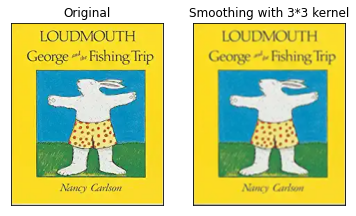

In [105]:
#convolution with Soomthning kernel (3*3)
kernel = 1/9*(np.array([[1,1,1],
                         [1,1,1],
                         [1,1,1]]))
result = performConvolution(red_channel,green_channel,blue_channel,kernel,result)
cv2.imwrite('/content/drive/MyDrive/ComputerVisionCoLabFiles/conBook3.png',result)
img = cv2.imread('/content/drive/MyDrive/ComputerVisionCoLabFiles/conBook3.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #matplotlib uses RGB
showOutput('Smoothing with 3*3 kernel',img)

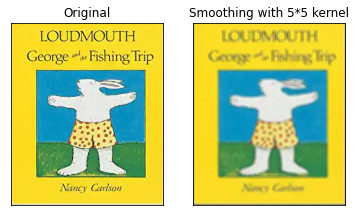

In [106]:
kernel = 1/25*(np.array([[1,1,1,1,1],
                         [1,1,1,1,1],
                         [1,1,1,1,1],
                         [1,1,1,1,1],
                         [1,1,1,1,1]]))
result = performConvolution(red_channel,green_channel,blue_channel,kernel,result)
cv2.imwrite('/content/drive/MyDrive/ComputerVisionCoLabFiles/conBook5.png',result)
img = cv2.imread('/content/drive/MyDrive/ComputerVisionCoLabFiles/conBook5.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #matplotlib uses RGB
showOutput('Smoothing with 5*5 kernel',img)

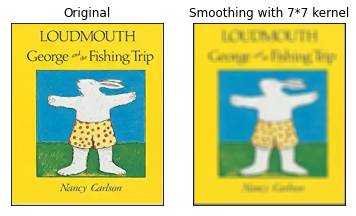

In [107]:
kernel = 1/49*(np.array([[1,1,1,1,1,1,1],
                         [1,1,1,1,1,1,1],
                         [1,1,1,1,1,1,1],
                         [1,1,1,1,1,1,1],
                         [1,1,1,1,1,1,1],
                         [1,1,1,1,1,1,1],
                         [1,1,1,1,1,1,1]]))
result = performConvolution(red_channel,green_channel,blue_channel,kernel,result)
cv2.imwrite('/content/drive/MyDrive/ComputerVisionCoLabFiles/conBook7.png',result)
img = cv2.imread('/content/drive/MyDrive/ComputerVisionCoLabFiles/conBook7.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #matplotlib uses RGB
showOutput('Smoothing with 7*7 kernel',img)

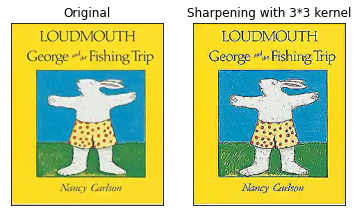

In [108]:
kernel = (np.array([[0,-1,0],
                         [-1,5,-1],
                         [0,-1,0]]))
result = performConvolution(red_channel,green_channel,blue_channel,kernel,result)
cv2.imwrite('/content/drive/MyDrive/ComputerVisionCoLabFiles/sharp.png',result)
img = cv2.imread('/content/drive/MyDrive/ComputerVisionCoLabFiles/sharp.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #matplotlib uses RGB
showOutput('Sharpening with 3*3 kernel',img)